Measuring RMSD and other metrics
================================

In [1]:
from pathlib import Path
import sys
from sys import stdout
import inspect

debug_local = True#False
local = Path("..").resolve()
code = local / "mm"
data  = local / "data"
inputs = data / "input"
output = data / "output"

if debug_local and code.exists():
    sys.path.insert(0, code.as_posix())
    print("extending pathes with local yspecies")
    print(sys.path)
    %load_ext autoreload
    %autoreload 2

extending pathes with local yspecies
['/data/sources/antibody-mm/mm', '/data/sources/antibody-mm/notebooks', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python39.zip', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python3.9', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python3.9/lib-dynload', '', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python3.9/site-packages', '/home/antonkulaga/micromamba/envs/antibody-mm/lib/python3.9/site-packages/IPython/extensions', '/home/antonkulaga/.ipython']


In [2]:
from pycomfort.files import *

In [3]:
from prody import *
from pylab import *
ion()

Measuring deepab accuracy
=========================

In [4]:
def printMatch(match):
   for i in match:
     print(f'Chain {i}     : {match[i]}')
   print(f'Length      : {len(match[0])}')
   print(f'Seq identity: {match[2]}')
   print(f'Seq overlap : {match[3]}')
   print(f'RMSD        : {calcRMSD(match[0], match[1])}\n')

In [5]:
inputs

PosixPath('/data/sources/antibody-mm/data/input')

In [6]:
ra_real = parsePDB(str(inputs / "RA" /"1adq_fixed_RF_short.pdb"))

@> 3481 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [7]:
ra_predicted = parsePDB(str(inputs / "RA" / "1ADQ_FV_deep.pdb" ))

@> 3481 atoms and 1 coordinate set(s) were parsed in 0.02s.


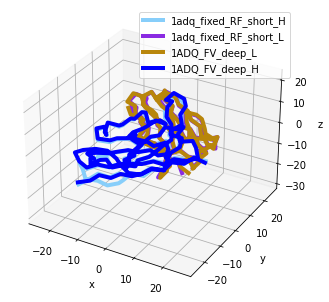

In [8]:
showProtein(ra_real, ra_predicted)
legend()

In [9]:
#matches = matchChains(ra_real, ra_predicted)
#for match in matches:
#    printMatch(match)

Benchmark evaluation
====================

In [10]:
benchmark_path = inputs / "antibodies_benchmark"
structures_path =  benchmark_path / "structures"

In [11]:
import polars as pl
df = pl.read_csv(benchmark_path / "antibodies.tsv", sep="\t")

In [12]:
antibody_col = pl.col("Protein 1")
antibody_col

In [62]:
antibodies = df.filter(pl.col("Cat.").str.contains("AA"))
fvs = antibodies.filter(antibody_col.str.contains("fv"))
#fabs = antibodies.filter(antibody_col.str.to_lowercase().contains("fab"))
fabs

Complex,Cat.,PDB ID 1,Protein 1,PDB ID 2,Protein 2,I-RMSD (Å),ΔASA(Å2),BM version introduced
str,str,str,str,str,str,f64,i64,f64
"""1AHW_AB:C""","""AA""","""1FGN_LH""","""Fab 5g9""","""1TFH_A""","""Tissue factor""",0.69,1899,2.0
"""1DQJ_AB:C""","""AA""","""1DQQ_CD""","""Fab Hyhel63""","""3LZT_""","""HEW lysozyme""",0.75,1765,2.0
"""1E6J_HL:P""","""AA""","""1E6O_HL""","""Fab""","""1A43_""","""HIV-1 capsid protein p24""",1.05,1245,2.0
"""1JPS_HL:T""","""AA""","""1JPT_HL""","""Fab D3H44""","""1TFH_B""","""Tissue factor""",0.51,1852,2.0
"""1MLC_AB:E""","""AA""","""1MLB_AB""","""Fab44.1""","""3LZT_""","""HEW lysozyme""",0.6,1392,2.0
"""1WEJ_HL:F""","""AA""","""1QBL_HL""","""Fab E8""","""1HRC_""","""Cytochrome C""",0.31,1177,2.0
"""2VIS_AB:C""","""AA""","""1GIG_LH""","""Fab""","""2VIU_ACE""","""Flu virus hemagglutinin""",0.8,1296,2.0
"""6B0S_HL:C""","""AA""","""6B0W_HL""","""1710 Fab fragment""","""3VDJ_A""","""circumsporozoite protein aTSR domain""",0.72,1353,5.5


In [37]:
antibodies

Complex,Cat.,PDB ID 1,Protein 1,PDB ID 2,Protein 2,I-RMSD (Å),ΔASA(Å2),BM version introduced
str,str,str,str,str,str,f64,i64,f64
"""1AHW_AB:C""","""AA""","""1FGN_LH""","""Fab 5g9""","""1TFH_A""","""Tissue factor""",0.69,1899,2.0
"""1DQJ_AB:C""","""AA""","""1DQQ_CD""","""Fab Hyhel63""","""3LZT_""","""HEW lysozyme""",0.75,1765,2.0
"""1E6J_HL:P""","""AA""","""1E6O_HL""","""Fab""","""1A43_""","""HIV-1 capsid protein p24""",1.05,1245,2.0
"""1JPS_HL:T""","""AA""","""1JPT_HL""","""Fab D3H44""","""1TFH_B""","""Tissue factor""",0.51,1852,2.0
"""1MLC_AB:E""","""AA""","""1MLB_AB""","""Fab44.1""","""3LZT_""","""HEW lysozyme""",0.6,1392,2.0
"""1S78_DC:A""","""AA""","""1L7I_HL""","""pertuzumab (Perjeta)""","""2A91_A""","""ErbB2""",1.13,2175,5.5
"""1VFB_AB:C""","""AA""","""1VFA_AB""","""Fv D1.3""","""8LYZ_""","""HEW lysozyme""",1.02,1383,2.0
"""1WEJ_HL:F""","""AA""","""1QBL_HL""","""Fab E8""","""1HRC_""","""Cytochrome C""",0.31,1177,2.0
"""2FD6_HL:U""","""AA""","""2FAT_HL""","""Plasminogen receptor antibody""","""1YWH_A""","""Plasminogen activator receptor""",1.07,1139,3.0


In [60]:
complexes = set(seq(df.select("Complex").rows()).map(lambda v: v[0]).map(lambda s: s).map(lambda s: s[0:s.index("_")]))
complexes

{'1AHW',
 '1DQJ',
 '1E6J',
 '1JPS',
 '1MLC',
 '1S78',
 '1VFB',
 '1WEJ',
 '2DD8',
 '2FD6',
 '2FJG',
 '2VIS',
 '2VXT',
 '2W9E',
 '3EO1',
 '3EOA',
 '3G6D',
 '3HI6',
 '3HMX',
 '3L5W',
 '3MJ9',
 '3MXW',
 '3RJQ',
 '3RVW',
 '3SE8',
 '3U7Y',
 '3V6Z',
 '3WD5',
 '4DN4',
 '4DW2',
 '4ETQ',
 '4FP8',
 '4FQI',
 '4G6J',
 '4G6M',
 '4GXU',
 '4M5Z',
 '5C7X',
 '5CBA',
 '5GRJ',
 '5HYS',
 '5KOV',
 '5O14',
 '5O1R',
 '5WHK',
 '5WK3',
 '5WUX',
 '5X0T',
 '5Y9J',
 '6A0Z',
 '6A77',
 '6AL0',
 '6B0S',
 '6BPC',
 '6OC3'}

In [85]:
bound_receptors = files(structures_path).filter(lambda v:  "b" in v.stem and  "r" in v.stem and v.stem[0:v.stem.index("_")] in complexes)
bound_ligands = files(structures_path).filter(lambda v:  "b" in v.stem and  "l" in v.stem and v.stem[0:v.stem.index("_")] in complexes)
len(bound_receptors.to_list())

55

In [87]:
import shutil
output = Path("/data/samples/docking/benchmarks/selected")
for r in bound_receptors:
    shutil.copy(r, output / r.name)

In [58]:
m[0]

(<AtomMap: Chain A from 1AHW_l_u -> Chain C from 1AHW_l_b from 1AHW_l_u (199 atoms)>,
 <AtomMap: Chain C from 1AHW_l_b -> Chain A from 1AHW_l_u from 1AHW_l_b (199 atoms)>,
 99.5,
 98.51485148514851)

In [60]:
calcRMSD(m[0][0], m[0][1])

1.3873621349407428